# Import Libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split

# Read dataset from file CSV

In [153]:
dataset = pd.read_csv('../Dataset/small_dataset.csv', index_col=[0])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 9341 to 3309
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     950 non-null    float64
 1   Area      868 non-null    float64
 2   Location  572 non-null    object 
dtypes: float64(2), object(1)
memory usage: 31.2+ KB


In [154]:
dataset.isna().sum()

Price        50
Area        132
Location    428
dtype: int64

# Splitting Dataset to Trainset and Testset

In [155]:
trainset, testset = train_test_split(dataset, random_state=55 ,test_size = 0.2)
trainset.reset_index(inplace=True, drop=True)
testset.reset_index(inplace=True, drop=True)

# Missing Data Processing

## Checking Nan value in dataset

### Trainset

In [156]:
trainset.isna().sum()

Price        43
Area        107
Location    332
dtype: int64

### Testset

In [157]:
testset.isna().sum()

Price        7
Area        25
Location    96
dtype: int64

## Area Processing

### Imputation

In [158]:
trainset_before = trainset.copy()
trainset.Area.fillna(trainset.Area.median(), inplace=True)
testset.Area.fillna(trainset.Area.median(), inplace=True)

### Visualizing

Text(0.5, 1.0, 'After')

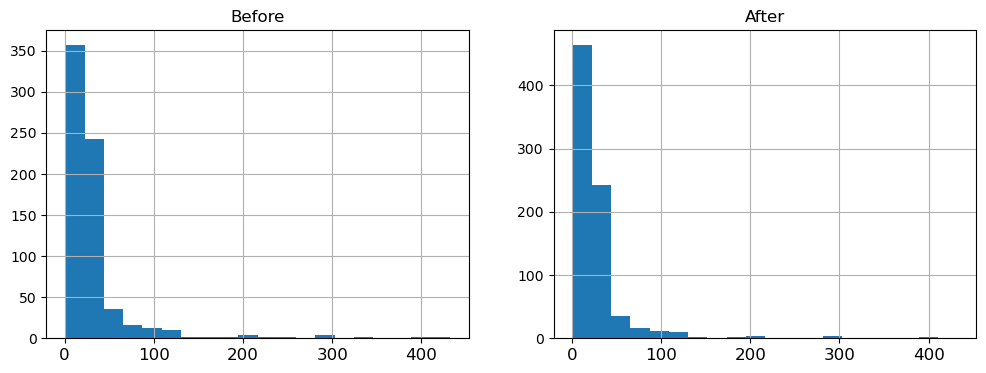

In [159]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
trainset_before['Area'].hist(bins=20)
plt.title('Before')
plt.subplot(1, 2, 2)
trainset['Area'].hist(bins=20)
plt.title('After')

After processing, the number of values in Area feature increase about 50 samples

## Ward Processing

### Imputation

In [160]:
trainset_before = trainset.dropna(subset='Location').reset_index(drop = True)
trainset['Location'].fillna('Unknown_W', inplace=True)
testset['Location'].fillna('Unknown_W', inplace=True)

### Visualizing

Text(0.5, 1.0, 'After')

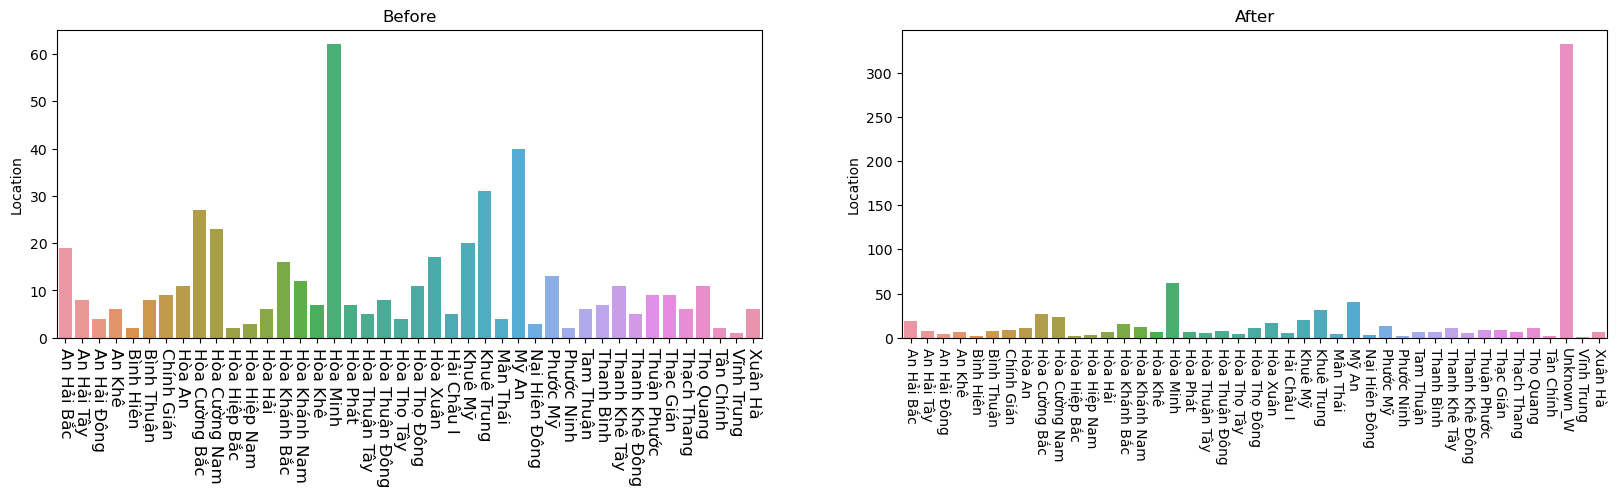

In [161]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = sorted(trainset_before.Location.unique()), y = trainset_before.groupby('Location')['Location'].count())
plt.rc('xtick', labelsize=10) 
plt.xticks(rotation=270)
plt.title('Before')


plt.subplot(1, 2, 2)
sns.barplot(x = sorted(trainset.Location.unique()), y = trainset.groupby('Location')['Location'].count())
plt.rc('xtick', labelsize=12) 
plt.xticks(rotation=270)
plt.title('After')


After processing, the most values of Location feature is Unknown_W

## Price Processing

### Imputation

In [162]:
trainset_before = trainset.copy()
trainset.Price.fillna(trainset.Price.median(), inplace=True)
testset.Price.fillna(trainset.Price.median(), inplace=True)

### Visualizing

Text(0.5, 1.0, 'After')

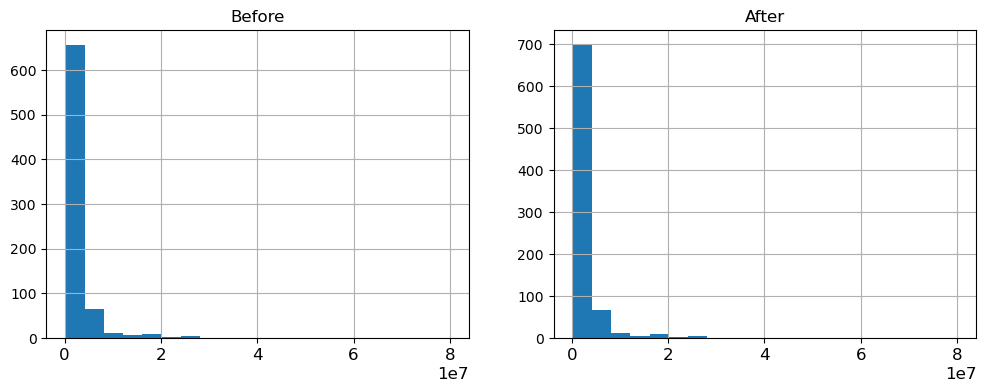

In [163]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
trainset_before['Price'].hist(bins=20)
plt.title('Before')
plt.subplot(1, 2, 2)
trainset['Price'].hist(bins=20)
plt.title('After')

After processing, the number of values in Area feature increase about 50 samples

# Outliers Processing

## Price Processing

### Processing

In [164]:
IQR = trainset['Price'].quantile(0.75) - trainset['Price'].quantile(0.25)
lower_bridge = trainset['Price'].quantile(0.25) - 1.5*IQR
upper_bridge = trainset['Price'].quantile(0.75) + 1.5*IQR

trainset_before = trainset.copy()

trainset.loc[trainset['Price']>upper_bridge, 'Price'] = upper_bridge
trainset.loc[trainset['Price']<lower_bridge, 'Price'] = lower_bridge

testset.loc[testset['Price']>upper_bridge, 'Price'] = upper_bridge
testset.loc[testset['Price']<lower_bridge, 'Price'] = lower_bridge

### Visualing

Text(0.5, 1.0, 'After')

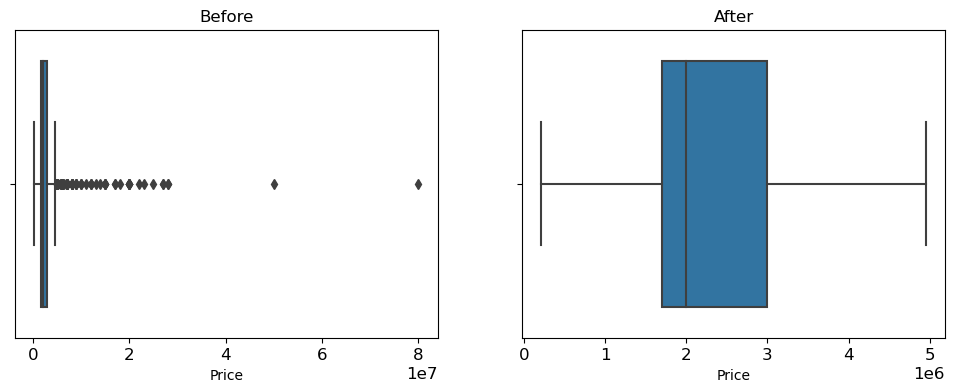

In [165]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=trainset_before['Price'])
plt.title('Before')
plt.subplot(1, 2, 2)
sns.boxplot(x=trainset['Price'])
plt.title('After')

After processing, the range of data decrease and there is no outliers in the dataset

## Area Processing

### Processing

In [166]:
IQR = trainset['Area'].quantile(0.75) - trainset['Area'].quantile(0.25)
lower_bridge = trainset['Area'].quantile(0.25) - 1.5*IQR
upper_bridge = trainset['Area'].quantile(0.75) + 1.5*IQR

trainset_before = trainset.copy()

trainset.loc[trainset['Area']>upper_bridge, 'Area'] = upper_bridge
trainset.loc[trainset['Area']<lower_bridge, 'Area'] = lower_bridge

testset.loc[testset['Area']>upper_bridge, 'Area'] = upper_bridge
testset.loc[testset['Area']<lower_bridge, 'Area'] = lower_bridge

### Visualizing

Text(0.5, 1.0, 'After')

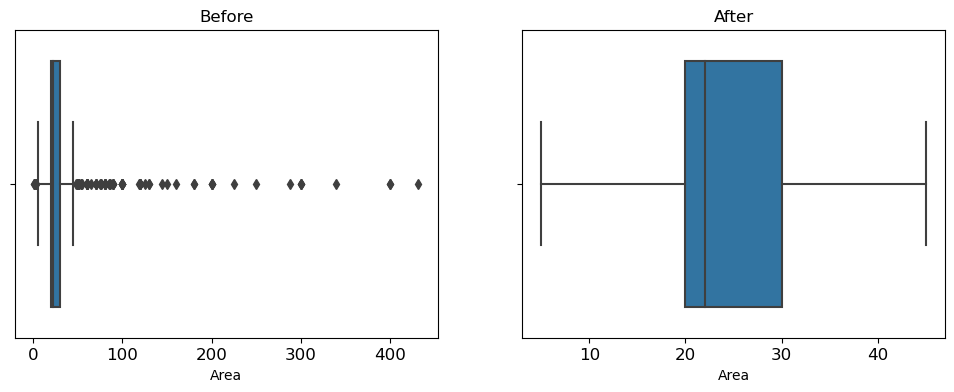

In [167]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=trainset_before['Area'])
plt.title('Before')
plt.subplot(1, 2, 2)
sns.boxplot(x=trainset['Area'])
plt.title('After')

After processing, the range of data decrease and there is no outliers in the dataset

# Scaling

In [168]:
area_min = trainset.Area.min()
area_max = trainset.Area.max()

## Area Scaling

### Transforming

In [169]:
trainset_before = trainset.copy()

trainset.Area = (trainset.Area - area_min) / (area_max - area_min)
testset.Area = (testset.Area - area_min) / (area_max - area_min)

### Visualizing

Text(0.5, 1.0, 'After')

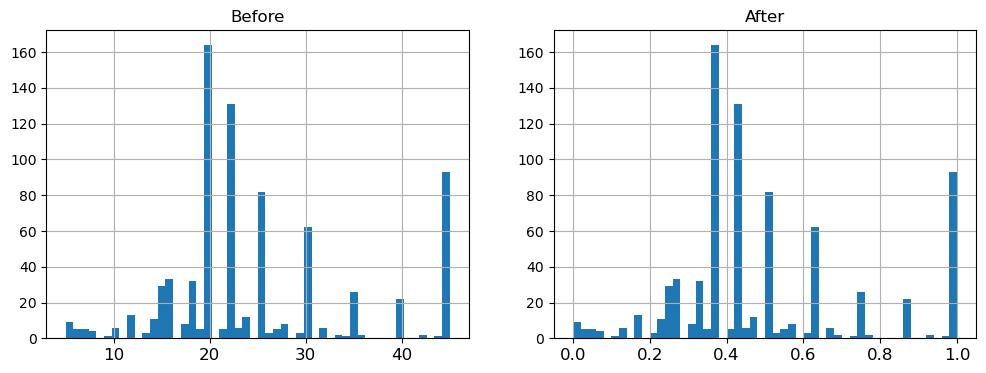

In [170]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
trainset_before['Area'].hist(bins=50)
plt.title('Before')
plt.subplot(1, 2, 2)
trainset['Area'].hist(bins=50)
plt.title('After')

The data after processing keeps its distribution but is scaled to range from 0 to 1

# Feature space after processing

<Axes: xlabel='Area', ylabel='Price'>

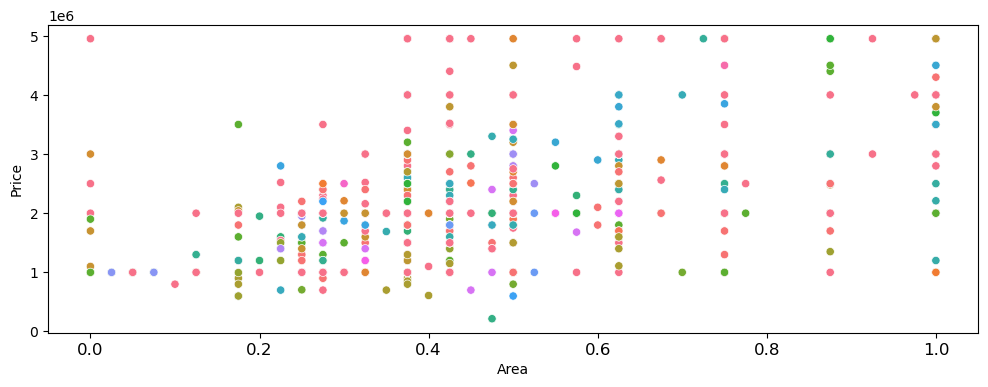

In [171]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=trainset, x='Area', y='Price', hue='Location', legend=None)

# One Hot Encoding

## For Ward

### For Trainset

In [172]:
ohe = OneHotEncoder(sparse_output=False)
Location = np.array(['Bình Hiên', 'Bình Thuận', 'Hải Châu I', 'Hải Châu II', 'Hòa Cường Bắc', 'Hòa Cường Nam', 'Hòa Thuận Đông', 'Hòa Thuận Tây', 'Nam Dương', 'Phước Ninh', 'Thạch Thang', 'Thanh Bình', 'Thuận Phước', 'Hòa An', 'Hòa Phát', 'Hòa Thọ Đông', 'Hòa Thọ Tây', 'Hòa Xuân', 'Khuê Trung',
            'Hòa Hiệp Bắc', 'Hòa Hiệp Nam', 'Hòa Khánh Bắc', 'Hòa Khánh Nam', 'Hòa Minh', 'Hòa Hải', 'Hòa Quý', 'Khuê Mỹ', 'Mỹ An', 'An Hải Bắc', 'An Hải Đông', 'An Hải Tây', 'Mân Thái', 'Nại Hiên Đông', 'Phước Mỹ', 'Thọ Quang', 
            'Hòa Phong', 'Hòa Bắc', 'Hòa Châu', 'Hòa Khương', 'Hòa Liên', 'Hòa Nhơn', 'Hòa Ninh', 'Hòa Phú', 'Hòa Phước', 'Hòa Sơn', 'Hòa Tiến', 'An Khê', 'Chính Gián', 'Hòa Khê', 'Tam Thuận', 'Tân Chính', 'Thạc Gián', 'Thanh Khê Đông', 
            'Thanh Khê Tây', 'Vĩnh Trung', 'Xuân Hà', 'Unknown_W'])

Location = Location.reshape(-1, 1)
ohe.fit(Location)
Location_encoded = ohe.transform(trainset['Location'].to_numpy().reshape(-1, 1))
Location_encoded_df = pd.DataFrame(data=Location_encoded, columns=ohe.get_feature_names_out())
Location_encoded_df.columns = Location_encoded_df.columns.str.replace('x0_', '')
trainset = pd.concat([trainset, Location_encoded_df], axis=1)
trainset.drop(['Location'], axis=1, inplace=True)
trainset

,Price,Area,An Hải Bắc,An Hải Tây,An Hải Đông,An Khê,Bình Hiên,Bình Thuận,Chính Gián,Hòa An,...,Thanh Khê Tây,Thanh Khê Đông,Thuận Phước,Thạc Gián,Thạch Thang,Thọ Quang,Tân Chính,Unknown_W,Vĩnh Trung,Xuân Hà
0,3400000.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2000000.0,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4950000.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2000000.0,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2510000.0,0.450,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1500000.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,2500000.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,2000000.0,0.425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
798,2500000.0,0.625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### For Testset

In [173]:
Location_encoded = ohe.transform(testset['Location'].to_numpy().reshape(-1, 1))
Location_encoded_df = pd.DataFrame(data=Location_encoded, columns=ohe.get_feature_names_out())
Location_encoded_df.columns = Location_encoded_df.columns.str.replace('x0_', '')
testset = pd.concat([testset, Location_encoded_df], axis=1)
testset.drop(['Location'], axis=1, inplace=True)
testset

,Price,Area,An Hải Bắc,An Hải Tây,An Hải Đông,An Khê,Bình Hiên,Bình Thuận,Chính Gián,Hòa An,...,Thanh Khê Tây,Thanh Khê Đông,Thuận Phước,Thạc Gián,Thạch Thang,Thọ Quang,Tân Chính,Unknown_W,Vĩnh Trung,Xuân Hà
0,3500000.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2500000.0,0.425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4950000.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000000.0,0.425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4950000.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2500000.0,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,2800000.0,0.325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,3200000.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,4950000.0,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [174]:
trainset.columns = trainset.columns.astype(str)
testset.columns = testset.columns.astype(str)

# Save Dataset to CSV files

In [ ]:
trainset.to_csv('../Training_Testing_Data/small_trainset.csv')
testset.to_csv('../Training_Testing_Data/small_testset.csv')